In [2]:
%matplotlib inline

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint

from math import sqrt, fabs
from scipy.optimize import minimize
from IPython.display import Image
from matplotlib.pyplot import imshow

sys.path.append('../')
from map import Map
from optimizer import *

plt.rcParams['figure.figsize'] = [24, 16] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50


A picture supposely taken from the Brevent.
[('Aiguille du Midi', (45.8793106, 6.8874243), (553, 410), 35.5),
 ('Mont Blanc du Tacul', (45.8566202, 6.8878189), (560, 221), 45.0),
 ('Mont Maudit', (45.8479158, 6.8749911), (488, 145), 56.3),
 ('Mont Blanc', (45.8326218, 6.8651749), (424, 22), 65.8),
 ('Dome du Gouter', (45.8428166, 6.8434424), (298, 104), 80.4),
 ('Aiguille du Gouter', (45.8508455, 6.831278), (226, 174), 92.3),
 ('Aiguille de Bionnassay', (45.8357347, 6.8184001), (153, 50), 97.2)]


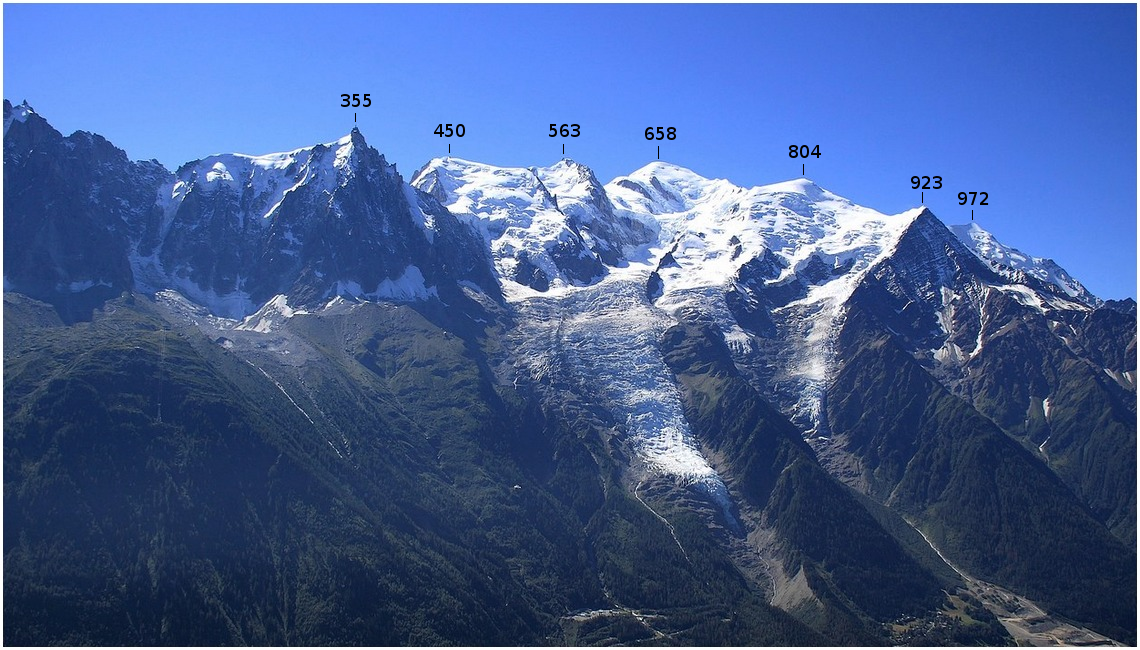

In [3]:
import data.brevent as data
print(format(data.description))
pprint.pprint(data.points)
Image(filename=data.picture)

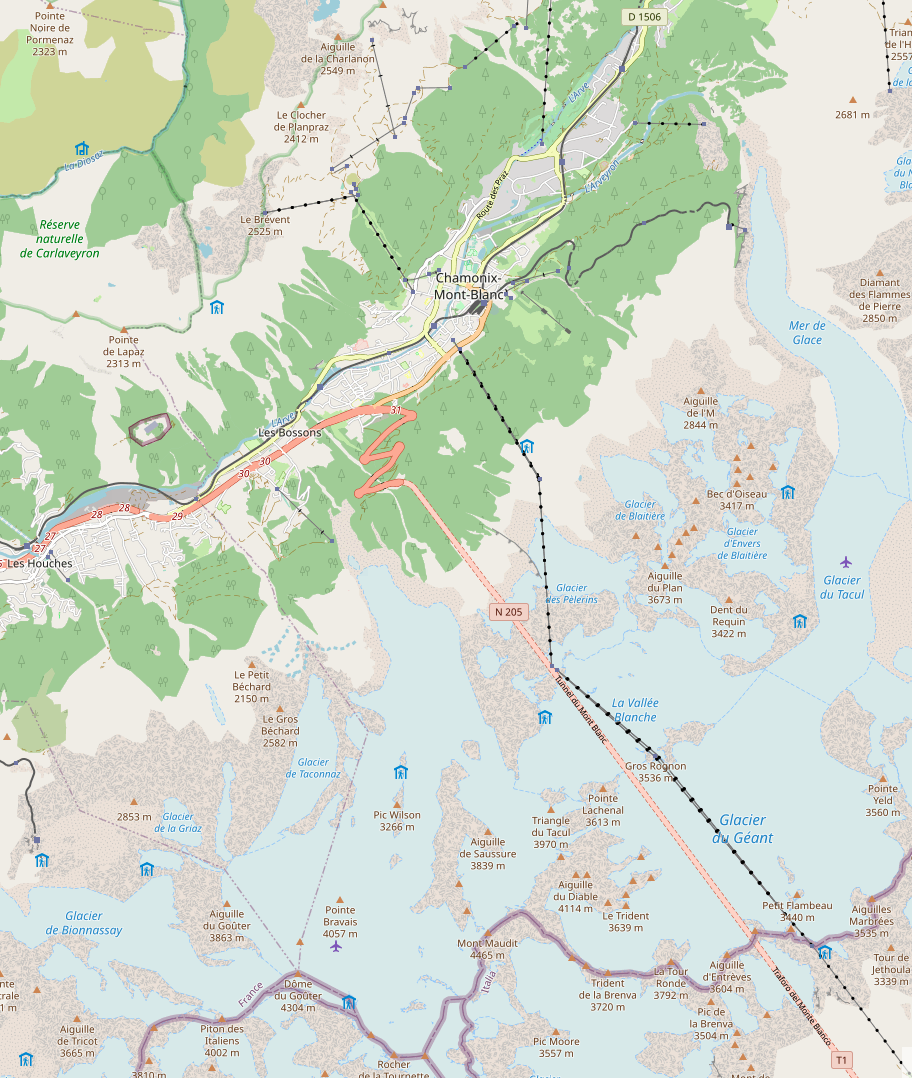

In [4]:
Image(filename=data.map)

Barrycenter: (259.2255988685583, 686.8532749933704)


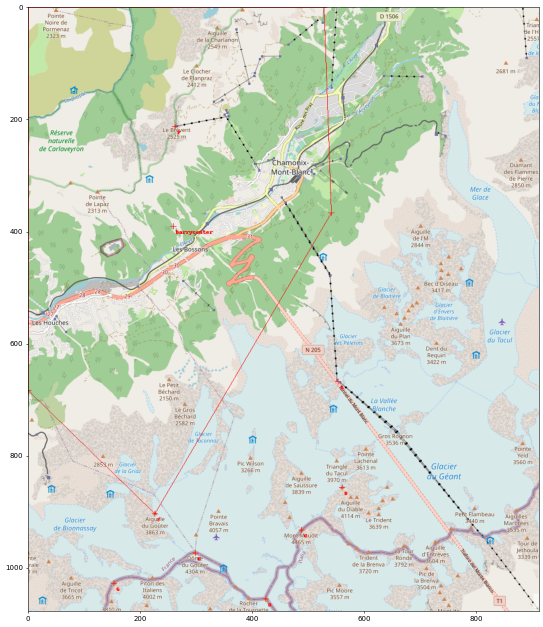

In [5]:
# Create a map and start drawing summits, photographer and area
map = Map(file=data.map)
for (summit, name) in zip(data.summits, "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    map.draw_point(summit, name, color="red")

if data.photographer is not None:
    map.draw_point(data.photographer, "P", color="red")

area = photographer_area(data.summits, data.dimensions)
map.draw_area(area, color="red")

barrycenter = barycenter(area)
map.draw_point(barrycenter, "barrycenter", color="red")
print("Barrycenter:", barrycenter)

map.show()

Optimizer:
  photographer: [384.71779379 801.73298565]
  error: 3.862469207512133e-05

Reality  :
  photographer: (262, 865)
  error: 0.0011253946741283428



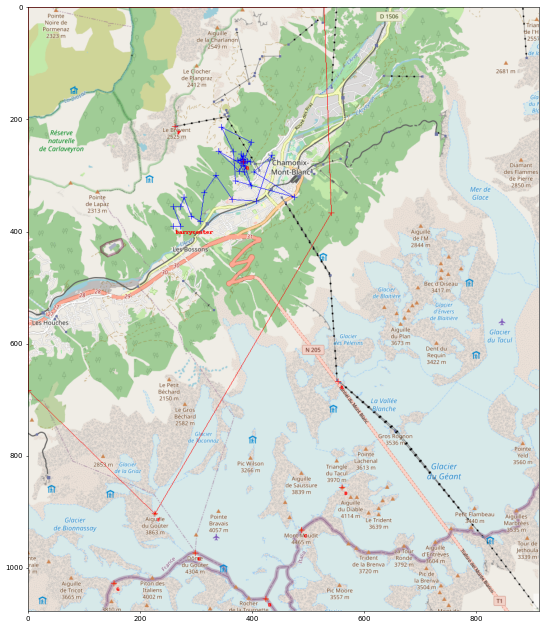

In [6]:
# Run the optimizer to locate the photographer
photograper, error, path = find_photograper(
    dimensions=map.dimensions,
    summits=data.summits,
    projections=data.projections
)
print("Optimizer:\n  photographer: {}\n  error: {}\n".format(photograper, error))
#pprint.pprint(path)

# Compute error at real location (or barrycenter)
refname, refpos = "Barrycenter", barrycenter
if data.photographer is not None:
    refname, refpos = "Reality", data.photographer
res = optimize_picture(photographer=refpos, summits=data.summits, projections=data.projections)
print("{}  :\n  photographer: {}\n  error: {}\n".format(refname, refpos, res.error))

# Display optimized position of the photographer
map.draw_path(path, color="blue")
map.draw_point(photograper, name="Q", color="red")

map.show()

1 %
2 %
3 %
4 %
5 %
6 %
7 %
8 %
9 %
10 %
11 %
12 %
13 %
14 %
15 %
16 %
17 %
18 %
19 %
20 %
21 %
22 %
23 %
24 %
25 %
26 %
27 %
28 %
29 %
30 %
31 %
32 %
33 %
34 %
35 %
36 %
37 %
38 %
39 %
40 %
41 %
42 %
43 %
44 %
45 %
46 %
47 %
48 %
49 %
50 %
51 %
52 %
53 %
54 %
55 %
56 %
57 %
58 %
59 %
60 %
61 %
62 %
63 %
64 %
65 %
66 %
67 %
68 %
69 %
70 %
71 %
72 %
73 %
74 %
75 %
76 %
77 %
78 %
79 %
80 %
81 %
82 %
83 %
84 %
85 %
86 %
87 %
88 %
89 %
90 %
91 %
92 %
93 %
94 %
95 %
96 %
97 %
98 %
99 %
100 %
error min, max: 0.000066, 86.067666


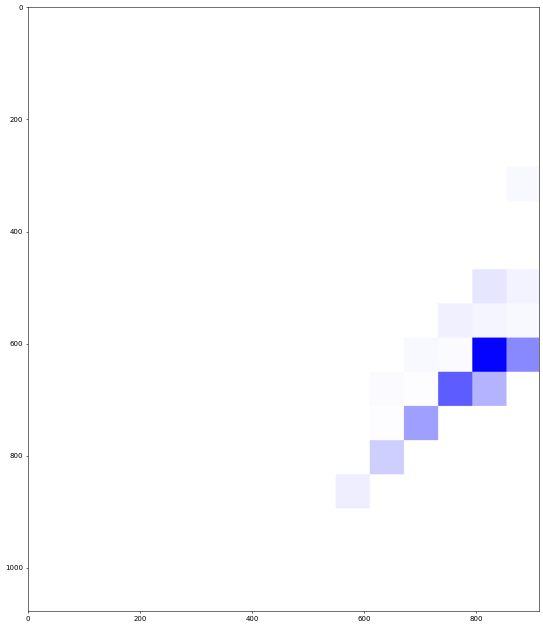

In [7]:
map.hot_colorize(
    colorfun=lambda point: optimize_picture(point, data.summits, data.projections).error,
    incr=30
)
map.show()